In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 1. Download the dataset

# 2. Load the dataset

In [2]:
data=pd.read_csv("Mall_Customers.csv")

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.rename(columns={"CustomerID":"customer_id","Gender":"gender","Age":"age","Annual Income (k$)":"annual_income",
                     "Spending Score (1-100)":"spending_scores"},inplace=True)

In [5]:
data.head()

,customer_id,gender,age,annual_income,spending_scores
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# 3. Perform Visualizations.

(array([ 88.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 112.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

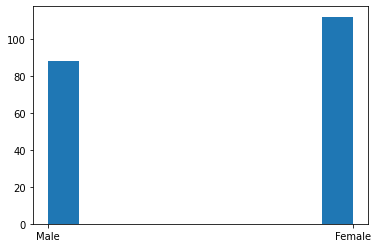

In [6]:
plt.hist(data['gender'])

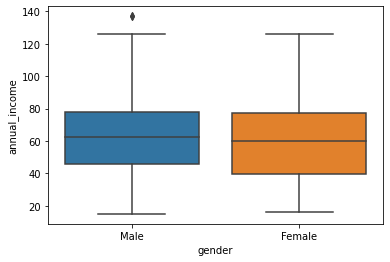

In [7]:
sns.boxplot(x=data['gender'],y=data['annual_income'])

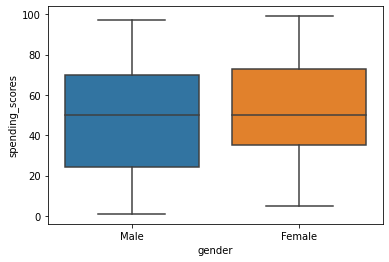

In [8]:
sns.boxplot(x=data['gender'],y=data['spending_scores'])

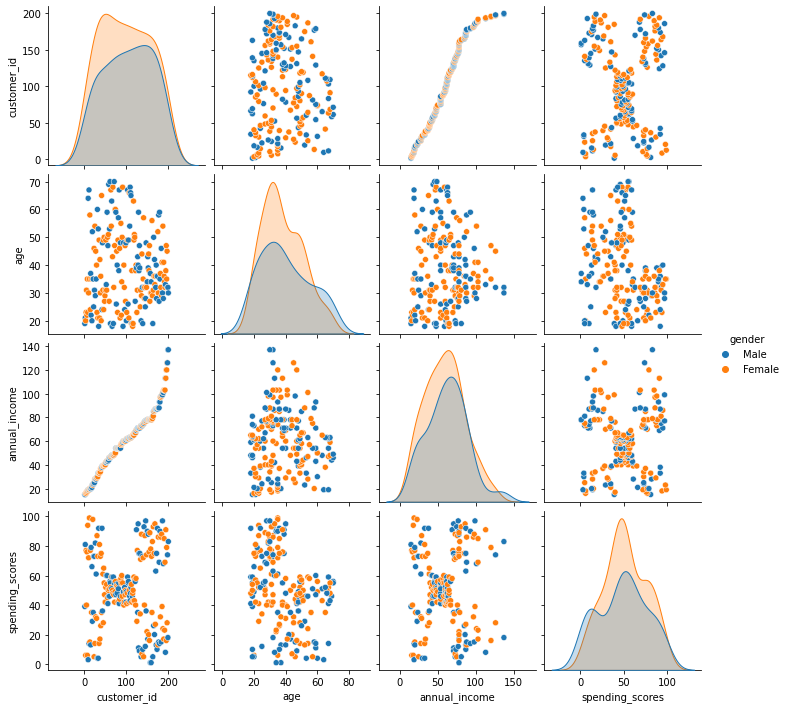

In [9]:
sns.pairplot(data,hue='gender')

# 4. Perform descriptive statistics on the dataset.

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   customer_id      200 non-null    int64 
 1   gender           200 non-null    object
 2   age              200 non-null    int64 
 3   annual_income    200 non-null    int64 
 4   spending_scores  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [11]:
data.describe()

,customer_id,age,annual_income,spending_scores
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# 5. Check for Missing values and deal with them.

In [12]:
data.isna().sum()

customer_id        0
gender             0
age                0
annual_income      0
spending_scores    0
dtype: int64

# 6. Find the outliers and replace them outliers

In [13]:
data.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


customer_id        100.50
age                 38.85
annual_income       60.56
spending_scores     50.20
dtype: float64

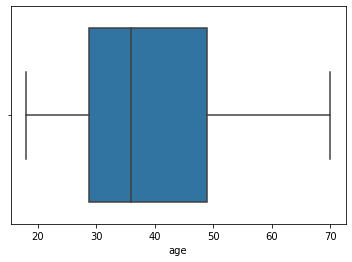

In [14]:
data['age']=np.where(data['age']< 0.22,0.53,data['age'])
sns.boxplot(x=data['age'])

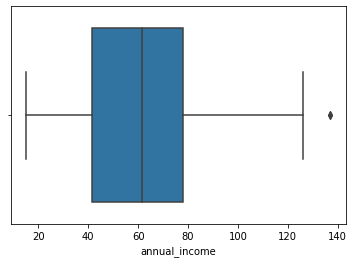

In [15]:
data['annual_income']=np.where(data['annual_income']< 0.22,0.53,data['annual_income'])
sns.boxplot(x=data['annual_income'])

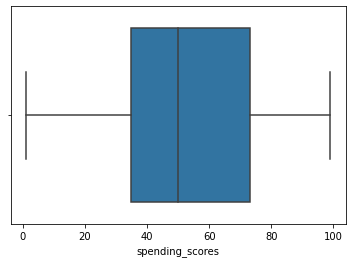

In [16]:
data['spending_scores']=np.where(data['spending_scores']< 0.22,0.53,data['spending_scores'])
sns.boxplot(x=data['spending_scores'])

# 7. Check for Categorical Columns and perform encoding

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      200 non-null    int64  
 1   gender           200 non-null    object 
 2   age              200 non-null    float64
 3   annual_income    200 non-null    float64
 4   spending_scores  200 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 7.9+ KB


In [18]:
encoder=LabelEncoder()
data['gender']=encoder.fit_transform(data['gender'])

In [19]:
data.head()

,customer_id,gender,age,annual_income,spending_scores
0,1,1,19.0,15.0,39.0
1,2,1,21.0,15.0,81.0
2,3,0,20.0,16.0,6.0
3,4,0,23.0,16.0,77.0
4,5,0,31.0,17.0,40.0


# 8. Scalaing the data

In [20]:
df=StandardScaler()
data1=df.fit_transform(data)

In [21]:
data1

array([[-1.7234121 ,  1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [-1.70609137,  1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-1.68877065, -0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-1.67144992, -0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-1.6541292 , -0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-1.63680847, -0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-1.61948775, -0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-1.60216702, -0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [-1.5848463 ,  1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-1.56752558, -0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [-1.55020485,  1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-1.53288413, -0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-1.5155634 , -0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-1.49824268, -0.88640526, -1.0

# 9. Perform any of the clustering algorithms

In [22]:
data.drop('customer_id',axis=1,inplace=True)

In [23]:
km = KMeans(n_clusters=3, random_state=0)

In [24]:
data['cluster'] = km.fit_predict(data)

In [25]:
data.head()

,gender,age,annual_income,spending_scores,cluster
0,1,19.0,15.0,39.0,2
1,1,21.0,15.0,81.0,2
2,0,20.0,16.0,6.0,2
3,0,23.0,16.0,77.0,2
4,0,31.0,17.0,40.0,2


In [26]:
data['cluster'].value_counts()

2    123
1     39
0     38
Name: cluster, dtype: int64

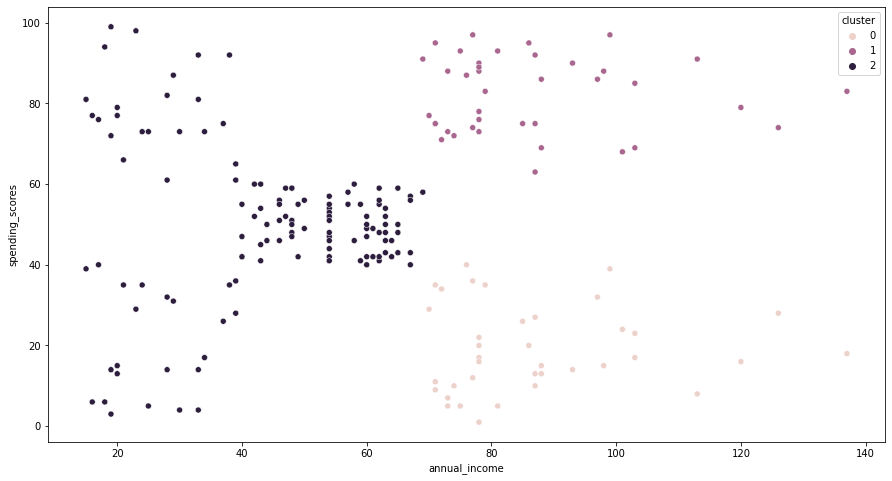

In [28]:
fig,ax = plt.subplots(figsize=(15,8))
sns.scatterplot(x=data['annual_income'],
                y=data['spending_scores'],
                hue=data['cluster'])
plt.show()